In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [157]:
df=pd.read_excel("../input/stock-analyse/Train_dataset.xlsx")
test = pd.read_excel("../input/stock-analyse/Test_dataset.xlsx")


In [158]:
df.head()

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
0,AA1,NYSE,Real Estate,700.29,12765.84,32.38,45.35,1208599.0,5.05,-0.43,0.0520,1.0,0.61,9.20,156.987852
1,AA2,NYSE,Information Tech,214.52,12765.84,33.25,170.56,13753356.0,3.10,0.23,0.0164,1.0,NaN,6.91,560.859622
2,AA3,NYSE,Information Tech,943.42,12765.84,88.27,143.58,6892003.0,7.70,0.23,0.0396,1.0,NaN,6.09,1279.732874
3,AA4,BSE,Materials,828.13,38182.08,73.66,151.76,8316793.0,4.80,0.03,0.0431,74.9,1.11,5.60,1121.787632
4,AA5,S&P 500,Real Estate,NaN,3351.28,23.79,NaN,3943312.0,8.06,-0.43,0.0244,1.0,1.07,9.46,382.962534


In [159]:
df.shape

(7383, 15)

In [160]:
df['Index'].value_counts()

NSE        1498
JSE        1479
S&P 500    1476
NYSE       1468
BSE        1462
Name: Index, dtype: int64

In [161]:
df['Industry'].value_counts()

Energy              1521
Materials           1515
Real Estate         1475
Information Tech    1451
Healthcare          1421
Name: Industry, dtype: int64

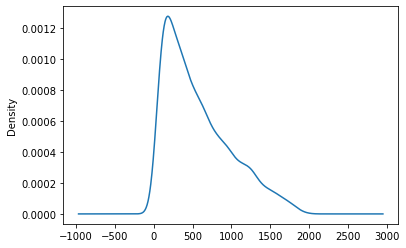

In [162]:
df['Stock Price'].plot(kind='density')

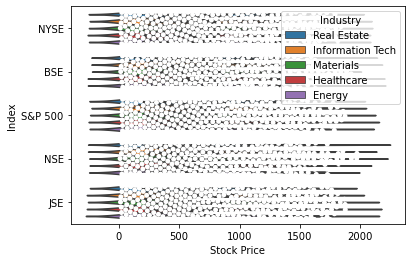

In [163]:
plt.figure()
sns.violinplot("Stock Price", "Index", hue = "Industry", data = df)
sns.swarmplot("Stock Price", "Index", data = df, color = "w")

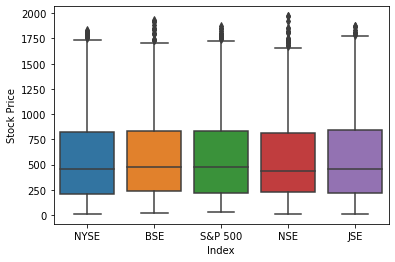

In [164]:
sns.boxplot(x=df['Index'],y=df['Stock Price'])

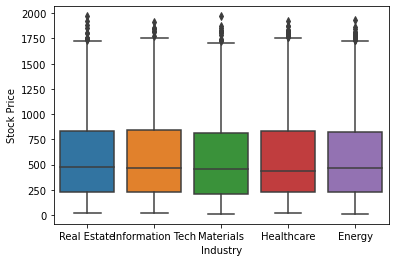

In [165]:
sns.boxplot(x=df['Industry'],y=df['Stock Price'])

In [166]:
df=df[df['Stock Price']<1750]

In [167]:

ntrain = df.shape[0]
ntest = test.shape[0]


In [168]:
y_train = df['Stock Price'].values
df = pd.concat((df, test)).reset_index(drop=True)
df.drop(['Stock Price'], axis=1, inplace=True)

In [169]:
df.shape

(10659, 14)

In [170]:
df['VWAP'].isnull().sum()

49

In [171]:
df['VWAP'].mean()

486.8327059377932

In [172]:
df.fillna(method ='pad',inplace=True)

In [173]:
df.head()

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio
0,AA1,NYSE,Real Estate,700.29,12765.84,32.38,45.35,1208599.0,5.05,-0.43,0.0520,1.0,0.61,9.20
1,AA2,NYSE,Information Tech,214.52,12765.84,33.25,170.56,13753356.0,3.10,0.23,0.0164,1.0,0.61,6.91
2,AA3,NYSE,Information Tech,943.42,12765.84,88.27,143.58,6892003.0,7.70,0.23,0.0396,1.0,0.61,6.09
3,AA4,BSE,Materials,828.13,38182.08,73.66,151.76,8316793.0,4.80,0.03,0.0431,74.9,1.11,5.60
4,AA5,S&P 500,Real Estate,828.13,3351.28,23.79,151.76,3943312.0,8.06,-0.43,0.0244,1.0,1.07,9.46


In [174]:
df=df.drop('Stock Index',1)

In [175]:
df['Index'].value_counts()

JSE        2200
NSE        2154
NYSE       2140
BSE        2085
S&P 500    2080
Name: Index, dtype: int64

In [176]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [177]:
index=pd.get_dummies(df['Index'])
df=df.join(index)
df=df.drop('Index',1)

In [178]:
ind=pd.get_dummies(df['Industry'])
df=df.join(ind)
df=df.drop('Industry',1)

In [179]:
df.isnull().sum()

VWAP                    0
General Index           0
NAV                     0
P/E Ratio               0
Volumes Traded          0
Inventory Turnover      0
Covid Impact (Beta)     0
Tracking Error          0
Dollar Exchange Rate    0
Put-Call Ratio          0
P/B Ratio               0
BSE                     0
JSE                     0
NSE                     0
NYSE                    0
S&P 500                 0
Energy                  0
Healthcare              0
Information Tech        0
Materials               0
Real Estate             0
dtype: int64

In [180]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [181]:
x_train = df[:ntrain]
x_test = df[ntrain:]

In [182]:
x_test.shape


(3331, 21)

In [183]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
sd.fit(x_train)
x_train=sd.transform(x_train)

In [184]:
le=LinearRegression()
le.fit(x_train,y_train)
y_le=le.predict(x_test)


In [186]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor(n_estimators=400,subsample=0.7)
gb.fit(x_train,y_train)
y_gb=gb.predict(x_test)


In [187]:
print(y_gb)

print(np.shape(y_gb))

[1072.11689162 1320.87865245  990.39573753 ... 1099.45262997 1612.6326737
 1155.59865653]
(3331,)


In [188]:
from catboost import CatBoostRegressor
model=CatBoostRegressor(iterations=200, depth=9, learning_rate=0.5, loss_function='RMSE')
model.fit(x_train,y_train)

0:	learn: 254.6071463	total: 11.8ms	remaining: 2.34s
1:	learn: 169.4079401	total: 23.2ms	remaining: 2.29s
2:	learn: 127.2115796	total: 34.3ms	remaining: 2.25s
3:	learn: 106.8721451	total: 45.1ms	remaining: 2.21s
4:	learn: 96.0169869	total: 56.1ms	remaining: 2.19s
5:	learn: 92.2663461	total: 67.2ms	remaining: 2.17s
6:	learn: 89.2420373	total: 78.9ms	remaining: 2.17s
7:	learn: 87.0635304	total: 89.7ms	remaining: 2.15s
8:	learn: 85.9849452	total: 101ms	remaining: 2.14s
9:	learn: 81.3699950	total: 111ms	remaining: 2.12s
10:	learn: 80.1366356	total: 122ms	remaining: 2.1s
11:	learn: 78.3009906	total: 133ms	remaining: 2.09s
12:	learn: 76.5798270	total: 144ms	remaining: 2.08s
13:	learn: 75.6695675	total: 156ms	remaining: 2.07s
14:	learn: 72.7067804	total: 169ms	remaining: 2.09s
15:	learn: 70.8873305	total: 181ms	remaining: 2.08s
16:	learn: 69.9173703	total: 192ms	remaining: 2.06s
17:	learn: 67.5927879	total: 203ms	remaining: 2.05s
18:	learn: 66.1237620	total: 216ms	remaining: 2.06s
19:	learn: 

158:	learn: 14.0648322	total: 1.86s	remaining: 479ms
159:	learn: 13.9681028	total: 1.87s	remaining: 467ms
160:	learn: 13.8247491	total: 1.88s	remaining: 456ms
161:	learn: 13.7506859	total: 1.89s	remaining: 444ms
162:	learn: 13.6371008	total: 1.9s	remaining: 432ms
163:	learn: 13.5984366	total: 1.91s	remaining: 420ms
164:	learn: 13.4648265	total: 1.93s	remaining: 409ms
165:	learn: 13.3616104	total: 1.94s	remaining: 397ms
166:	learn: 13.2884085	total: 1.95s	remaining: 386ms
167:	learn: 13.1841622	total: 1.96s	remaining: 374ms
168:	learn: 12.9948150	total: 1.97s	remaining: 362ms
169:	learn: 12.9597851	total: 1.98s	remaining: 350ms
170:	learn: 12.8829270	total: 2s	remaining: 338ms
171:	learn: 12.7874112	total: 2.01s	remaining: 327ms
172:	learn: 12.7069392	total: 2.02s	remaining: 315ms
173:	learn: 12.6099092	total: 2.03s	remaining: 303ms
174:	learn: 12.5222239	total: 2.04s	remaining: 291ms
175:	learn: 12.4363611	total: 2.05s	remaining: 279ms
176:	learn: 12.3554522	total: 2.06s	remaining: 268

In [193]:



StackingSubmission1 = pd.DataFrame( y_gb)
    

    
StackingSubmission1.to_csv("Part1.csv",index=False)


NameError: name 'indexes' is not defined